In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Data Preprocess
1. Drop nan value
2. Drop the value that the 'gender == Other'
3. Convert Categories to numbers
4. Split the Dataset into train set and test set

In [7]:
# Step 1: Drop nan value
df = df.dropna()

In [8]:
# Step 2: Drop the value that the 'gender == Other'
df = df.loc[df['gender'] != 'Other']

In [9]:
# Step 3: Convert Categories to numbers
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [10]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int8   
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int8   
 6   work_type          4908 non-null   int8   
 7   Residence_type     4908 non-null   int8   
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int8   
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 330.7 KB


In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
# Step 4: Split the Dataset into train set and test set
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Selection

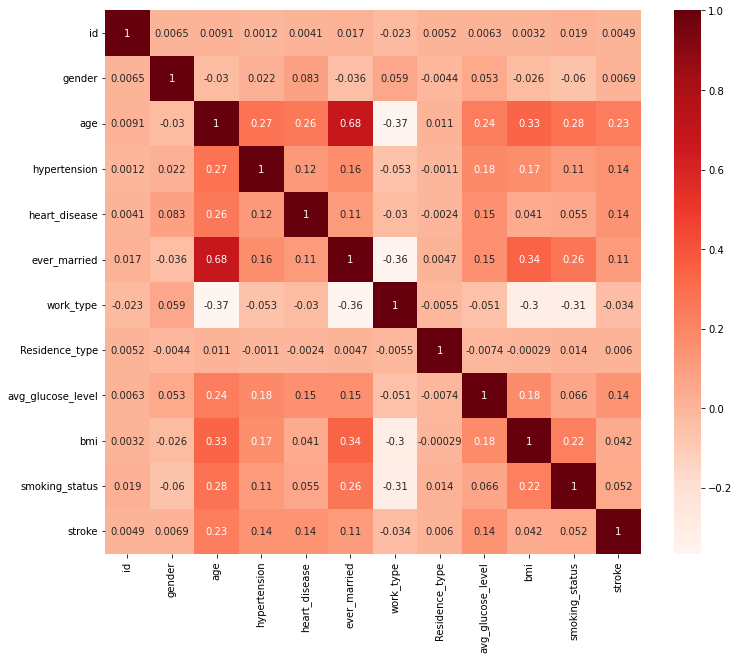

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                  0.232313
hypertension         0.142503
heart_disease        0.137929
ever_married         0.105051
avg_glucose_level    0.138984
stroke               1.000000
Name: stroke, dtype: float64

In [16]:
df=df[['age','hypertension','heart_disease','ever_married','avg_glucose_level','stroke']]

In [17]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [18]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(x, y)

In [19]:
X_res['stroke']=y_res

In [20]:
data=X_res

In [21]:
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,52.0,0,0,1,67.50,0
1,64.0,0,0,1,97.08,0
2,30.0,0,0,1,72.49,0
3,25.0,0,0,1,97.52,0
4,30.0,0,0,0,82.56,0
...,...,...,...,...,...,...
465,50.0,0,0,1,102.16,1
466,57.0,1,0,1,212.08,1
467,67.0,1,0,1,179.12,1
468,80.0,1,1,1,175.29,1


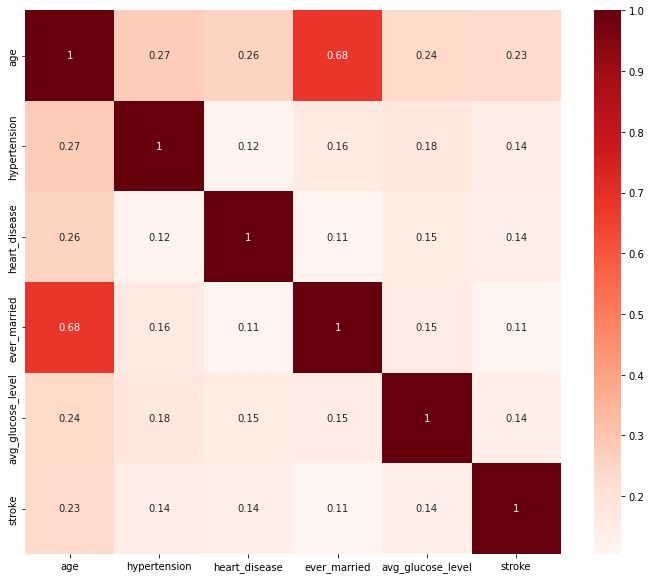

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

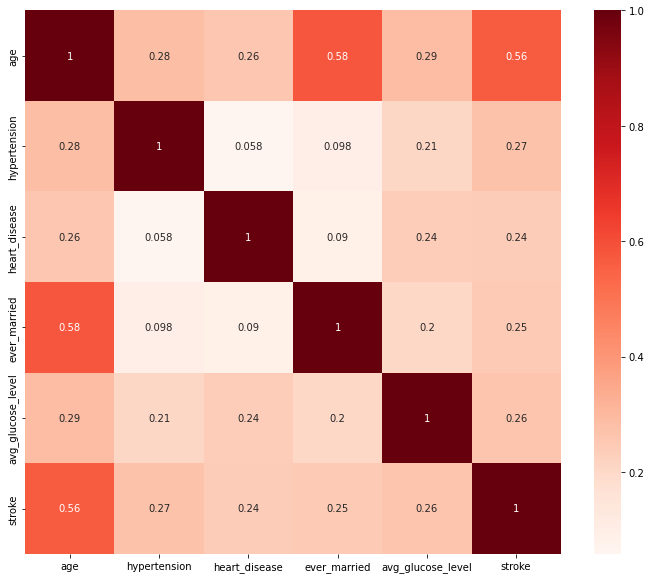

In [23]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
data['stroke'].value_counts()

0    261
1    209
Name: stroke, dtype: int64

In [25]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
y_test.value_counts()

0    54
1    40
Name: stroke, dtype: int64

# Predict
- Method 1: Naive Bayes
    - 1.1: GaussianNB
    - 1.2: BernoulliNB
    - 1.3: ComplementNB
- Method 2: Decision Tree
    - 2.1: DecisionTreeClassifier
    - 2.2: ExtraTreeClassifier
- Method 3: KNN
- Method 4: SVM
- Method 5: Neural Network

### Method 1: Naive Bayes

[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

In the Bayesian method, we tried three Bayesian classification methods: GaussianNB, BernoulliNB, ComplementNB. Among the three of them, the results of GaussianNB are relatively best, but generally speaking, their prediction results are not very good. 

Adjusting the parameters in these three methods is of little significance. On the one hand, their own results are too bad, and the improvement that the adjustment can improve is limited; on the other hand, we also tried to adjust some parameters, but the results didn't change or even were worse.

In [27]:
# Naive Bayes - GaussianNB
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)
print("Train Score:", model_gnb.score(X_train, y_train))
print("Test Score:", model_gnb.score(X_test, y_test))

Train Score: 0.7127659574468085
Test Score: 0.723404255319149


In [28]:
# Naive Bayes - BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb = model_bnb.fit(X_train, y_train)
print("Train Score:", model_bnb.score(X_train, y_train))
print("Test Score:", model_bnb.score(X_test, y_test))

Train Score: 0.6569148936170213
Test Score: 0.6914893617021277


In [29]:
# Naive Bayes - ComplementNB
from sklearn.naive_bayes import ComplementNB
model_conb = ComplementNB()
model_conb = model_conb.fit(X_train, y_train)
print("Train Score:", model_conb.score(X_train, y_train))
print("Test Score:", model_conb.score(X_test, y_test))

Train Score: 0.601063829787234
Test Score: 0.574468085106383


### Method 2: Decision Tree
[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

In this section, we mainly use two kinds of decision tree classifiers: DecisionTreeClassifier and ExtraTreeClassifier. We explored the influence of the following parameters on the decision tree model:
- criterion: This parameter can determine how the function measures the quality of a split.
- splitter: This parameter can determine the strategy that is used to choose the split at each node.
- max_depth: This parameter set the maximum depth of the tree.
- min_samples_split: This parameter set the minimum number of samples required to split an internal node.
- min_samples_leaf: This parameter set the minimum number of samples required to be at a leaf node.
- random_state: This parameter controls the randomness of the estimator.

The parameter that has the greatest impact on the model is random_state. In the default state, each time you run this model will be different, because it will be random each time. However, even if you fix a value to it, the model will still become very different when you restart the entire program. Therefore, in order to find the best parameters in the model, the parameters must be readjusted every time the program is restarted and the best one must be found, instead of fixing a value to the parameters like other models.

There are 2 options in criterion and splitter. "gini" and "entropy" are for criterion, "random" and "best" are for splitter. Which option is selected by these two parameters is not absolute. We have tried several times and found that the best model in different situations may be different in these two parameters, and we have not found any rules at the same time. Therefore, when finding the parameters of the best model, this one can only be tried, and it is difficult to judge which one should be selected through experience.

Because the next three parameters(max_depth, min_samples_split and min_samples_leaf) are of numeric type, it is easier to find the law. In the test data, they have no obvious laws. When they change, the correct rate will fluctuate in a certain range. But in the training data, there are some very stable rules. On max_depth, as max_depth continues to increase, the accuracy rate will continue to rise until it finally stabilizes to 100%. On min_samples_split and min_samples_leaf, as they continue to increase, the overall accuracy rate will continue to decline. We analyze the reasons and think that when max_depth becomes larger, min_samples_split and min_samples_leaf become smaller, the model is more likely to overfit; when max_depth becomes smaller, min_samples_split and min_samples_leaf become larger, the model is more likely to underfit.

Therefore, to find the best parameter set, you need to try different parameter combinations, so that the model can achieve a balance between over-fitting and under-fitting, so as to find the best model.

In [30]:
random_state_num = 0

In [31]:
# Decision Tree - DecisionTreeClassifier

from sklearn import tree
def decision_tree(print_flag = False, **args):
    model_tree = tree.DecisionTreeClassifier(**args, random_state=random_state_num)
    model_tree = model_tree.fit(X_train, y_train)
    if print_flag:
        print("args:", args)
        print("Score: {}, {}".format(model_tree.score(X_train, y_train),model_tree.score(X_test, y_test)))
        # print("Train Score:", model_tree.score(X_train, y_train))
        # print("Test Score:", model_tree.score(X_test, y_test))
        print("--------------")
    return model_tree.score(X_train, y_train), model_tree.score(X_test, y_test), args

def get_best_decision_tree():
    criterions = ["gini", "entropy"]
    splitters = ["best", "random"]
    max_depths = [i for i in range(1,18)]
    min_samples_splits = [i for i in range(2,18)]
    min_samples_leaves = [i for i in range(1,5)]
    
    train_scores, test_scores, args_records = [], [], []
    for criterion in criterions:
        for splitter in splitters:
            for max_depth in max_depths:
                for min_samples_split in min_samples_splits:
                    for min_samples_leaf in min_samples_leaves:
                        outputs = decision_tree(criterion = criterion,
                                      splitter = splitter,
                                      max_depth = max_depth,
                                      min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf)
                        train_score, test_score, args = outputs
                        train_scores.append(train_score)
                        test_scores.append(test_score)
                        args_records.append(args)
                        
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_decision_tree():
    print("Baseline:")
    decision_tree(print_flag=True)
    
    outputs = get_best_decision_tree()
    print("Best Model:")
    print("args: ", outputs[2])
    print("Score: {}, {}".format(outputs[0], outputs[1]))

compare_decision_tree()

Baseline:
args: {}
Score: 1.0, 0.7021276595744681
--------------
Best Model:
args:  {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1}
Score: 0.7526595744680851, 0.8191489361702128


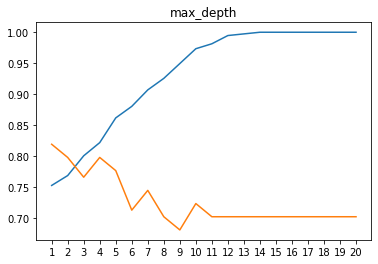

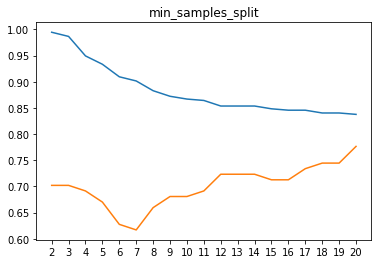

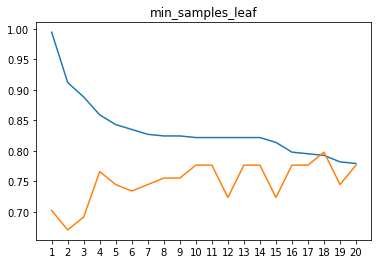

In [32]:
# Decision Tree - DecisionTreeClassifier

# max_depth
def plot_tree_max_depth():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("max_depth")
    plt.show()

# min_samples_split
def plot_tree_samples_split():
    x_data = []
    train_data = []
    test_data = []
    for num in range(2, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = 12,
                                                min_samples_split = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(2, 21)])
    plt.title("min_samples_split")
    plt.show()

# min_samples_leaf
def plot_tree_min_samples_leaf():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = 12,
                                                min_samples_split = 2, min_samples_leaf = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("min_samples_leaf")
    plt.show()


plot_tree_max_depth()
plot_tree_samples_split()
plot_tree_min_samples_leaf()

In [33]:
# Decision Tree - ExtraTreeClassifier

def extra_tree(print_flag = False, **args):
    model_tree = tree.ExtraTreeClassifier(**args, random_state=random_state_num)
    model_tree = model_tree.fit(X_train, y_train)
    if print_flag:
        print("args:", args)
        print("Score: {}, {}".format(model_tree.score(X_train, y_train),model_tree.score(X_test, y_test)))
        # print("Train Score:", model_tree.score(X_train, y_train))
        # print("Test Score:", model_tree.score(X_test, y_test))
        print("--------------")
    return model_tree.score(X_train, y_train), model_tree.score(X_test, y_test), args

def get_best_extra_tree():
    criterions = ["gini", "entropy"]
    splitters = ["best", "random"]
    max_depths = [i for i in range(1,18)]
    min_samples_splits = [i for i in range(2,18)]
    min_samples_leaves = [i for i in range(1,5)]
    
    train_scores, test_scores, args_records = [], [], []
    for criterion in criterions:
        for splitter in splitters:
            for max_depth in max_depths:
                for min_samples_split in min_samples_splits:
                    for min_samples_leaf in min_samples_leaves:
                        outputs = extra_tree(criterion = criterion,
                                      splitter = splitter,
                                      max_depth = max_depth,
                                      min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf)
                        train_score, test_score, args = outputs
                        train_scores.append(train_score)
                        test_scores.append(test_score)
                        args_records.append(args)
                        
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_extra_tree():
    print("Baseline:")
    extra_tree(print_flag=True)
    
    outputs = get_best_extra_tree()
    print("Best Model:")
    print("args: ", outputs[2])
    print("Score: {}, {}".format(outputs[0], outputs[1]))

compare_extra_tree()
# extra_tree()
# _,_ = extra_tree(criterion = "gini", splitter = "best")
# extra_tree(criterion = "gini", splitter = "random")
# extra_tree(criterion = "entropy", splitter = "best")
# extra_tree(criterion = "entropy", splitter = "random")

Baseline:
args: {}
Score: 1.0, 0.648936170212766
--------------
Best Model:
args:  {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 3}
Score: 0.800531914893617, 0.8085106382978723


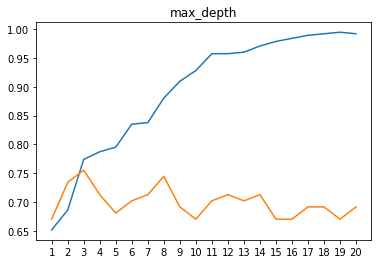

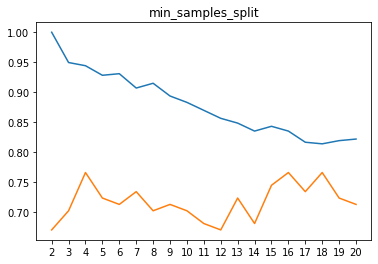

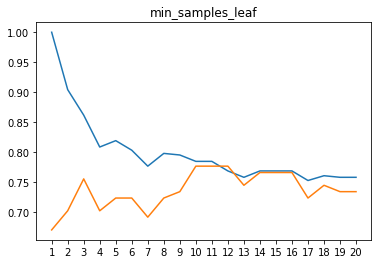

In [34]:
# Decision Tree - ExtraTreeClassifier

# max_depth
def plot_extratree_max_depth():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("max_depth")
    plt.show()

# min_samples_split
def plot_extratree_samples_split():
    x_data = []
    train_data = []
    test_data = []
    for num in range(2, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best",
                                                min_samples_split = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(2, 21)])
    plt.title("min_samples_split")
    plt.show()
    # print(test_data.index(max(test_data)))
    

# min_samples_leaf
def plot_extratree_min_samples_leaf():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best", min_samples_leaf = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("min_samples_leaf")
    plt.show()

plot_extratree_max_depth()
plot_extratree_samples_split()
plot_extratree_min_samples_leaf()

In [35]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)
print("Train Score:", model_knn.score(X_train, y_train))
print("Test Score:", model_knn.score(X_test, y_test))

Train Score: 0.8377659574468085
Test Score: 0.6702127659574468


In [36]:
# SVM
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

print("Train Score:", model_svm.score(X_train, y_train))
print("Test Score:", model_svm.score(X_test, y_test))

Train Score: 0.7340425531914894
Test Score: 0.7446808510638298


In [37]:
# Neural Network
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
print("Train Score:", model_MLP.score(X_train, y_train))
print("Test Score:", model_MLP.score(X_test, y_test))

Train Score: 0.7526595744680851
Test Score: 0.7659574468085106


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
y_pred=model_MLP.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[42, 12],
       [10, 30]], dtype=int64)

In [40]:
recall_score(y_test,y_pred)

0.75